In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#reading file for data alaysis such as computing skew, correlation coefficient, distribution, feature relevance(importance) 
dataframe=pd.read_excel('C:/Users/Demeke/Desktop/Data Mining/black-line hospital lung cancer patient dataset.xlsx')

In [36]:
# correlation cofficient 
corr=dataframe.corr()
round(corr,2)

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
Age,1.00,-0.20,0.10,0.15,0.07,0.13,0.03,0.08,0.00,0.01,0.05,0.06
Gender,-0.20,1.00,-0.25,-0.23,-0.22,-0.21,-0.12,-0.21,-0.18,-0.22,-0.15,-0.16
Air Pollution,0.10,-0.25,1.00,0.75,0.71,0.63,0.60,0.48,0.61,0.59,0.61,0.64
Alcohol Usage,0.15,-0.23,0.75,1.00,0.88,0.76,0.67,0.55,0.59,0.72,0.67,0.72
Genetic Risk,0.07,-0.22,0.71,0.88,1.00,0.84,0.73,0.54,0.61,0.83,0.63,0.70
Lung Disease,0.13,-0.21,0.63,0.76,0.84,1.00,0.60,0.58,0.57,0.78,0.60,0.61
Obesity,0.03,-0.12,0.60,0.67,0.73,0.60,1.00,0.49,0.68,0.67,0.81,0.83
Smoking,0.08,-0.21,0.48,0.55,0.54,0.58,0.49,1.00,0.76,0.65,0.56,0.52
Passive Smoker,0.00,-0.18,0.61,0.59,0.61,0.57,0.68,0.76,1.00,0.70,0.64,0.70
Chest Pain,0.01,-0.22,0.59,0.72,0.83,0.78,0.67,0.65,0.70,1.00,0.71,0.65


<Axes: >

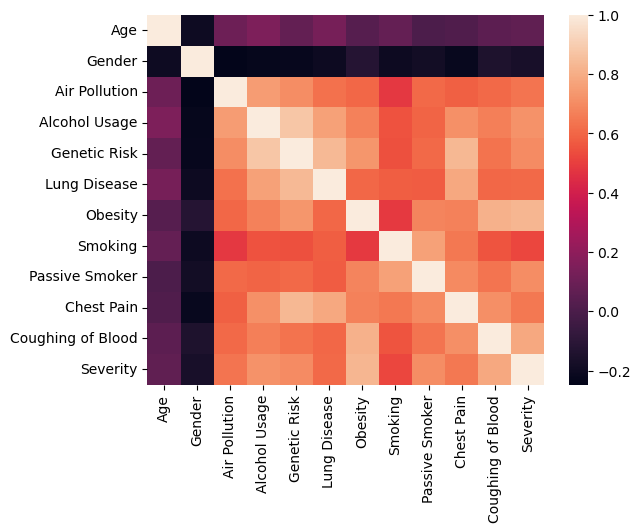

In [37]:
import seaborn as sns
sns.heatmap(corr)

In [82]:
from sklearn import preprocessing
dataframe=dataframe.iloc[:,:-1]# training data
# normalization 
x = dataframe.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataframe)
normalized_data = pd.DataFrame(x_scaled)

In [75]:
# skew value for the data set
normalized_data.columns=['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk','Lung Disease','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood']
print(round(normalized_data.skew(),2))

Age                  0.55
Gender               0.40
Air Pollution        0.13
Alcohol Usage       -0.02
Genetic Risk        -0.13
Lung Disease        -0.22
Obesity              0.03
Smoking              0.38
Passive Smoker       0.41
Chest Pain           0.16
Coughing of Blood    0.12
dtype: float64


<Axes: ylabel='Density'>

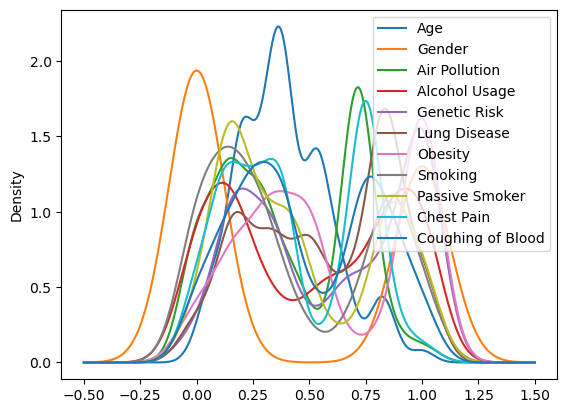

In [76]:
# distribution of the values of the dataset 

normalized_data.plot.density()


In [3]:
#removing those features which has less correlation coefficient
del dataframe['Age']
del dataframe['Gender']

In [4]:
y=dataframe['Severity']# label 
X=dataframe.iloc[:,:-1]#  data

In [56]:
most_relevant_features=model.feature_importances_ # feature_importances calling
sort_importance=np.sort(most_relevant_features) # sorting them

In [6]:
# normalization of the data frame
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled)

In [7]:
#train test split (80/20) 80 for training and 20 for testing 
X_train,X_test,y_train,y_test=train_test_split(normalized,y,test_size=0.2,random_state=False)

In [8]:
# decision tree for computing the relevance of each risk factors of lung cancer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
node_pairs = {
    "node 1": ["node 2", "node 3"],
    "node 2": ["node 4", "node 5"],
    "node 3": ["node 6", "node 7"],
    "node 4": ["node 8", "node 9"],
    "node 5": ["node 10", "node 11"] 
    
}

In [63]:
def node_importance(
    node_main: str, 
    node_left: str, 
    node_right: str, 
    n_entries_weight: dict, 
    i_sq: dict
    ) -> float:
  
   
    # Calculating the main nodes part of the equation 
    _main_part = n_entries_weight[node_main] * i_sq[node_main]

    # Calculating the left child nodes part of the equation
    _left_part = n_entries_weight[node_left] * i_sq[node_left]

    # Calculating the right child nodes part of the equation
    _right_part = n_entries_weight[node_right] * i_sq[node_right]

    # Returning the gain of the node_main; This gain is the importance of the node_main
# Calculating the importance of each features
importance = {}
for node in node_pairs:
    importance[node] = round(node_importance(node, *node_pairs[node], n_entries_weight, i_sq), 9)

print(f"Node importance: {importance}")

# Going from node importance to feature importance
feature_importances_ = {}
for node in node_pairs: 
    # Extracting the feature name 
    _ft_name = feature_in_node[node]

    # Extracting the feature importance
    _ft_imp = importance[node]

    # Adding the feature importance to the feature importance dictionary
    if _ft_name in feature_importance:
        feature_importance[_ft_name] += _ft_imp
    else:
        feature_importance[_ft_name] = _ft_imp

# Adding any missing features 
for feature in features:
    if feature not in feature_importance:
        feature_importance[feature] = 0

print(f"Feature importance before normalization: {feature_importanceS}")

# Dividing the feature importance by the sum of importances
_sum_importance = sum(feature_importance.values())
for feature in feature_importances_:
    feature_importances_[feature] = round(feature_importances_[feature]/_sum_importance, 9)

In [84]:
most_relevant_features=model.feature_importances_ # feature_importances calling
sort_importance=np.sort(most_relevant_features) # sorting them
print(sort_importance)

[0.03109805 0.03778043 0.0389245  0.04918126 0.05000115 0.05286358
 0.13989993 0.21017429 0.39007681]


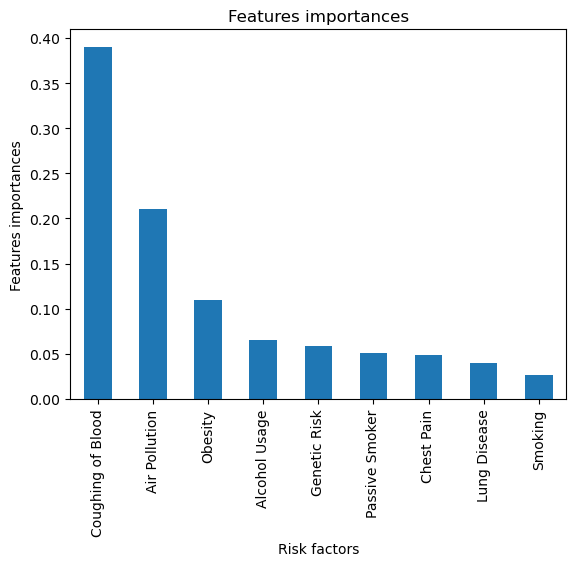

In [12]:
normalized.columns=['Air Pollution','Alcohol Usage','Genetic Risk','Lung Disease','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood']
plt.title("Features importances")
plt.xlabel('Risk factors')
plt.ylabel('Features importances')
feat_importances = pd.Series(model.feature_importances_, index=normalized.columns.values)
feat_importances.nlargest(9).plot(kind='bar')
#plt.figure(figsize=(4,2))
plt.show()

In [40]:
# reading the preprocessed data and develop the detection model
dataframe=pd.read_excel('C:/Users/Demeke/Desktop/Data Mining/black-line hospital lung cancer patient dataset.xlsx')


In [41]:
del dataframe["Age"]
del dataframe["Gender"]
print(dataframe.shape)

(1465, 10)


In [15]:
# importing 
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

In [58]:
X=dataframe.iloc[:,:-1]# data
y=dataframe['Severity']# label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=False)

In [80]:
# number of testing instance 
print(X_test.shape)

(293, 9)


In [20]:
# decetcion accuracy using XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train,y_train)
res=xgb_clf.predict(X_test)
#xgb_acc=accuracy_score(y_test,res)
accuracy = accuracy_score(y_test, res)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test, res,average='weighted' )
recall = recall_score(y_test, res, average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}",2)


Accuracy = 0.9897610921501706
Precision = 0.9901600106378263
Recall = 0.9897610921501706 2


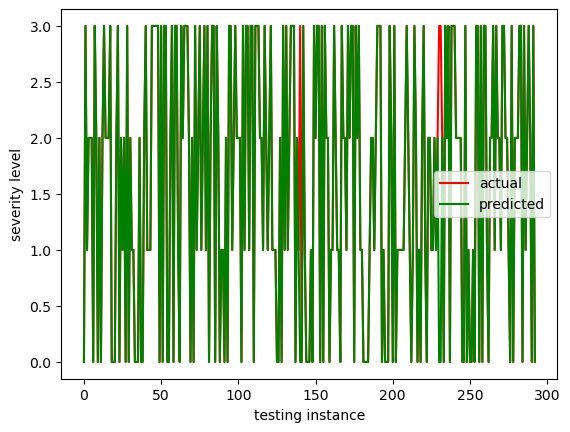

In [21]:
#drawing the actual and predicted value of the testing data set
axis=[]
for h in range(len(y_test)):
    axis.append(h)
plt.plot(axis,y_test, label="actual", color='r')
plt.plot(axis,res, label="predicted", color='g')
plt.xlabel('testing instance')
plt.ylabel('severity level')
plt.legend()
plt.show()

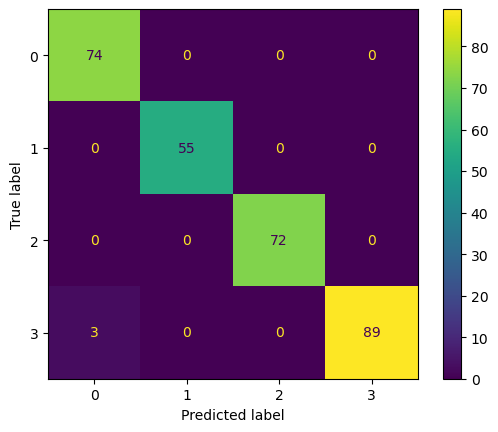

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, res, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

In [27]:
# detection accuracy with svc 
#support vector machine
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test, y_pred,average='weighted' )
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")


Accuracy = 0.9044368600682594
Precision = 0.9054465457236952
Recall = 0.9044368600682594


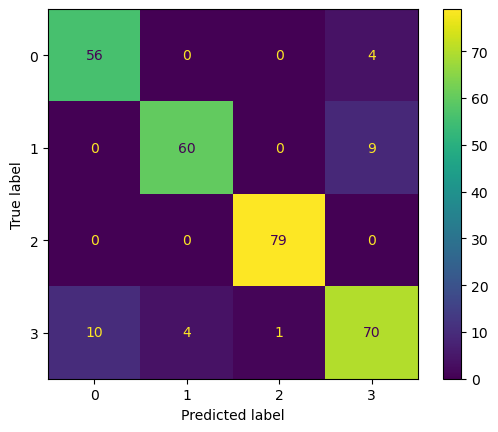

In [28]:
# ploting the confiusion matrix by svm classifier
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [64]:
#detection accuracy knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
y_knn=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_knn)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test, y_knn,average='weighted' )
recall = recall_score(y_test, y_knn, average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")


Accuracy = 0.8907849829351536
Precision = 0.9013182458176505
Recall = 0.8907849829351536


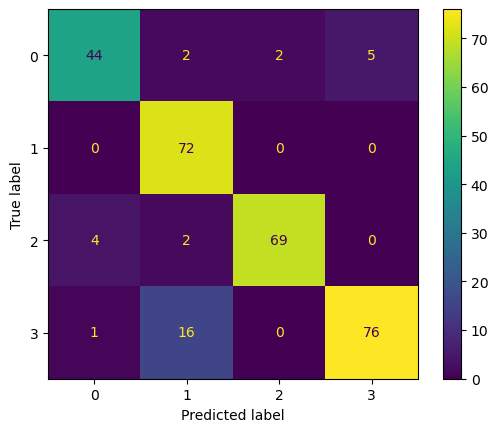

In [65]:
# ploting the confiusion matrix by KNN classifier
cm = confusion_matrix(y_test, y_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [78]:
# detection accuracy using MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(80,),max_iter=100)
clf.fit(X_train,y_train)
y_mlp=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_mlp)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test, y_mlp,average='weighted' )
recall = recall_score(y_test, y_mlp, average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")

Accuracy = 0.931740614334471
Precision = 0.9359986837102715
Recall = 0.931740614334471


C:\Users\Demeke\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


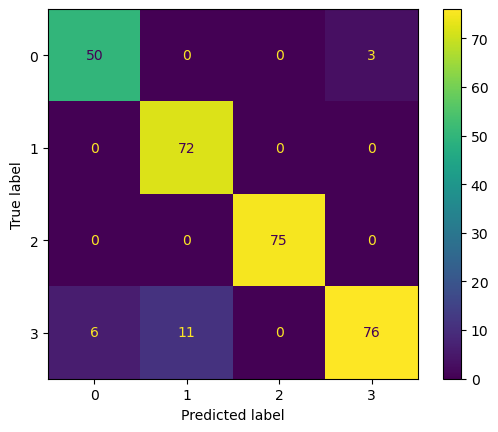

In [79]:
# ploting the confiusion matrix by KNN classifier
cm = confusion_matrix(y_test, y_mlp, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

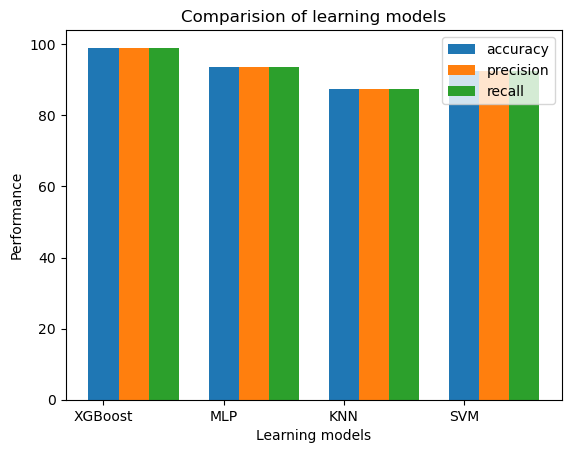

In [102]:
# comparision of the 4 machine learning algorithms of accuracy, precision, and recall
import numpy as np
import matplotlib.pyplot as plt
models=['XGBoost','MLP','KNN','SVM']
accuracy=[98.9,93.5,87.3,92.4]
precision=[99,93.6,87.5,92.5]
recall=[98.9,93.5,87.3,92.4]

X_axis=np.arange(len(models))
plt.bar(X_axis-0.0,accuracy,0.25,label='accuracy')
plt.bar(X_axis+0.25,precision,0.25,label='precision')
plt.bar(X_axis+0.50,recall,0.25,label='recall')

plt.xticks(X_axis,models)
plt.title('Comparision of learning models')
plt.xlabel('Learning models')
plt.ylabel('Performance')
plt.legend()
plt.show()